In [69]:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import warnings
    warnings.filterwarnings('ignore')
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder
    from sklearn.linear_model import LogisticRegression
    from sklearn import metrics
    from sklearn.impute import SimpleImputer
    from scipy.stats import zscore
    from sklearn.linear_model import ElasticNet
    from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
    from sklearn.linear_model import SGDRegressor
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import r2_score,mean_squared_error
    from sklearn.pipeline import Pipeline
    from scipy.stats import boxcox
    from sklearn.metrics import mean_squared_error,mean_absolute_error
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score

In [2]:
hdf=pd.read_csv('happiness_score_dataset.csv')
hdf

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
hdf.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
hdf.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


<AxesSubplot:>

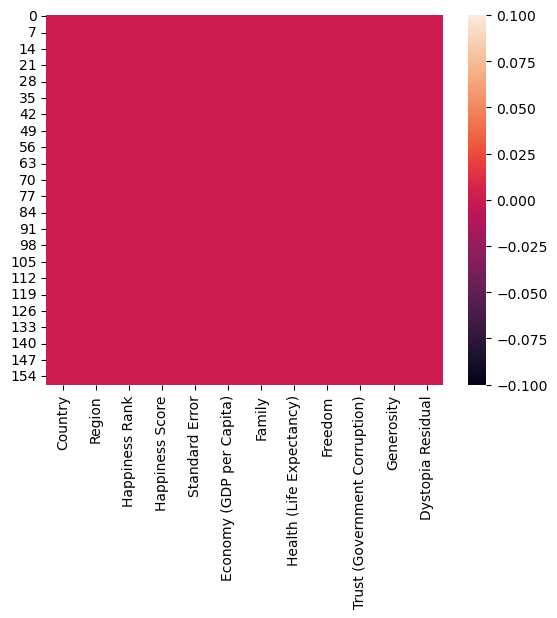

In [6]:
sns.heatmap(hdf.isnull())

In [7]:
hdf.isnull()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
le=LabelEncoder()
hdf['Country']=le.fit_transform(hdf['Country'])
list1=['Country','Region','Family']
for val in list1:
    hdf[val]=le.fit_transform(hdf[val].astype(str))
hdf

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,94,9,1,7.587,0.03411,1.39651,154,0.94143,0.66557,0.41978,0.29678,2.51738
1,16,9,2,7.561,0.04884,1.30232,157,0.94784,0.62877,0.14145,0.43630,2.70201
2,146,9,3,7.527,0.03328,1.32548,155,0.87464,0.64938,0.48357,0.34139,2.49204
3,136,9,4,7.522,0.03880,1.45900,152,0.88521,0.66973,0.36503,0.34699,2.46531
4,131,5,5,7.427,0.03553,1.32629,151,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,73,8,154,3.465,0.03464,0.22208,39,0.42864,0.59201,0.55191,0.22628,0.67042
154,87,8,155,3.340,0.03656,0.28665,65,0.31910,0.48450,0.08010,0.18260,1.63328
155,95,4,156,3.006,0.05015,0.66320,57,0.72193,0.15684,0.18906,0.47179,0.32858
156,128,8,157,2.905,0.08658,0.01530,60,0.22396,0.11850,0.10062,0.19727,1.83302


In [28]:
hdf.dtypes

Country                            int32
Region                             int32
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                             int32
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [10]:
hdf.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

<AxesSubplot:ylabel='Frequency'>

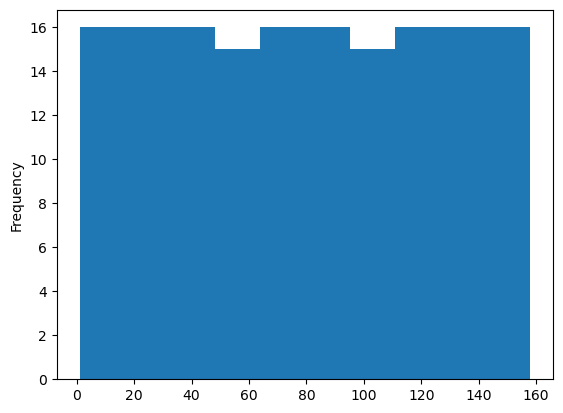

In [11]:
hdf['Happiness Rank'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

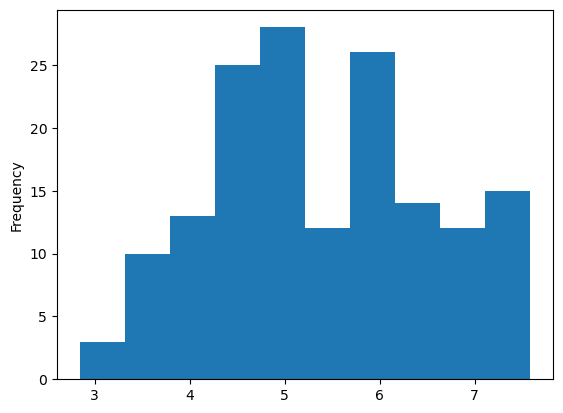

In [12]:
hdf['Happiness Score'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

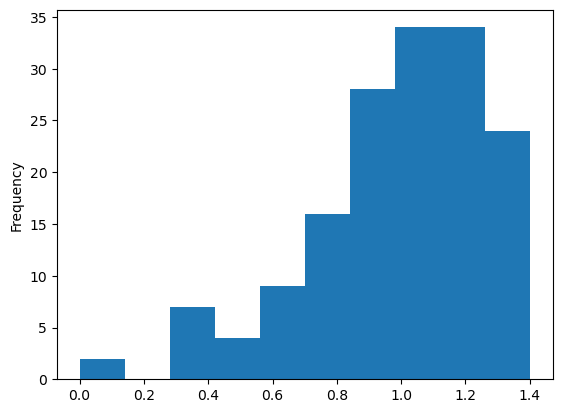

In [13]:
hdf['Family'].plot.hist()

In [15]:
hdf['Family']=boxcox(hdf['Family'],0)

In [ ]:
hdf['Family'].plot.hist()

Country                             AxesSubplot(0.125,0.53;0.110714x0.35)
Region                           AxesSubplot(0.257857,0.53;0.110714x0.35)
Happiness Rank                   AxesSubplot(0.390714,0.53;0.110714x0.35)
Happiness Score                  AxesSubplot(0.523571,0.53;0.110714x0.35)
Standard Error                   AxesSubplot(0.656429,0.53;0.110714x0.35)
Economy (GDP per Capita)         AxesSubplot(0.789286,0.53;0.110714x0.35)
Family                              AxesSubplot(0.125,0.11;0.110714x0.35)
Health (Life Expectancy)         AxesSubplot(0.257857,0.11;0.110714x0.35)
Freedom                          AxesSubplot(0.390714,0.11;0.110714x0.35)
Trust (Government Corruption)    AxesSubplot(0.523571,0.11;0.110714x0.35)
Generosity                       AxesSubplot(0.656429,0.11;0.110714x0.35)
Dystopia Residual                AxesSubplot(0.789286,0.11;0.110714x0.35)
dtype: object

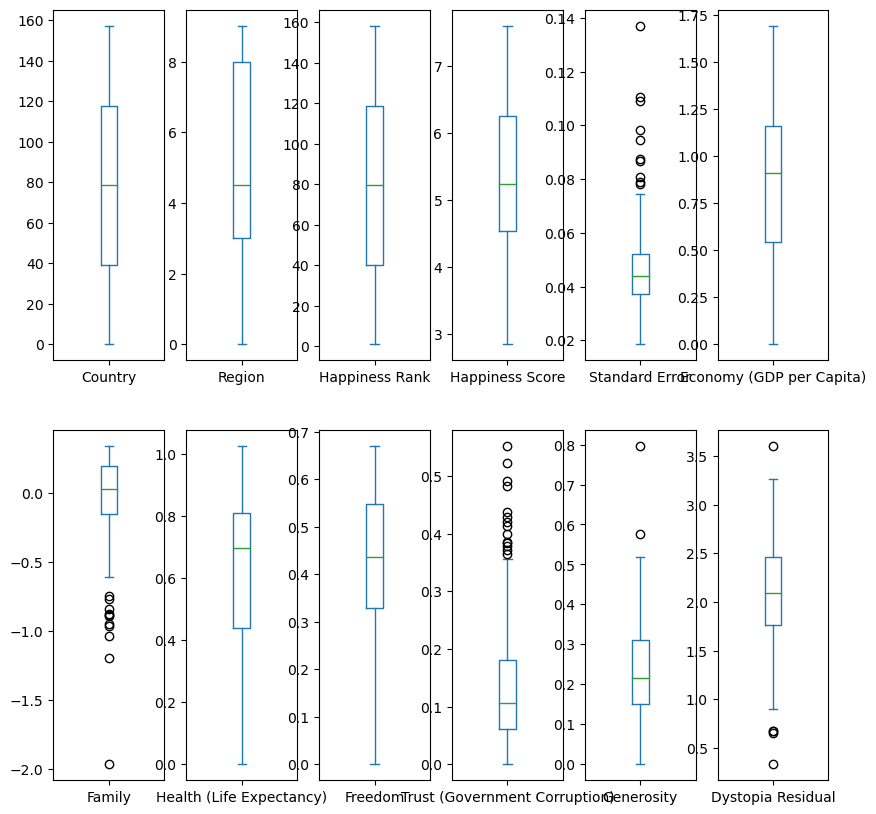

In [17]:
hdf.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

In [18]:
z=np.abs(zscore(hdf))
z

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.822192,1.300256,1.721000,1.937360,0.805926,1.369621,NaN,1.263408,1.577438,2.309652,0.471040,0.758258
1,0.734492,1.300256,1.699075,1.914581,0.055889,1.135226,NaN,1.289434,1.332456,0.016480,1.575856,1.092857
2,0.230214,1.300256,1.677149,1.884792,0.854487,1.192861,NaN,0.992229,1.469659,2.842774,0.824293,0.712335
3,1.545722,1.300256,1.655224,1.880411,0.531526,1.525130,NaN,1.035145,1.605131,1.852081,0.868638,0.663893
4,0.076738,0.040302,1.633299,1.797179,0.722845,1.194876,NaN,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...,...,...,...
153,1.238770,0.965117,1.633576,1.674055,0.774917,1.552987,NaN,0.818610,1.087740,3.413922,0.087228,2.588925
154,0.953743,0.965117,1.655501,1.783571,0.662582,1.392303,NaN,1.263362,0.372033,0.529210,0.433117,0.843967
155,0.800267,0.375441,1.677427,2.076199,0.132534,0.455245,NaN,0.372199,1.809238,0.381419,1.856891,3.208430
156,0.142513,0.965117,1.699352,2.164688,2.263962,2.067566,NaN,1.649648,2.064472,0.357715,0.316950,0.481985


In [19]:
threshold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 153, 155], dtype=int64), array([ 9,  4,  4,  4, 10,  9, 11], dtype=int64))


In [20]:
hdf.shape

(158, 12)

In [22]:
hdf_new=hdf[(z<3).all(axis=1)]

In [23]:
hdf_new.shape

(0, 12)

In [24]:
hdf_new

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [ ]:
dont know how remove outliers here as if i remove outliers everything is going

In [29]:
hdf.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,78.500000,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,45.754781,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,39.250000,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,78.500000,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,117.750000,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,157.000000,1.025250,0.669730,0.551910,0.795880,3.602140


In [39]:
x=hdf.iloc[:,4:12]

In [40]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,154,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,157,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,155,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,152,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,151,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,0.03464,0.22208,39,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.03656,0.28665,65,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.05015,0.66320,57,0.72193,0.15684,0.18906,0.47179,0.32858
156,0.08658,0.01530,60,0.22396,0.11850,0.10062,0.19727,1.83302


In [49]:
y=hdf.iloc[:,3:4]

In [50]:
y

,Happiness Score
0,7.587
1,7.561
2,7.527
3,7.522
4,7.427
...,...
153,3.465
154,3.340
155,3.006
156,2.905


In [51]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.30,random_state=45)

In [52]:
x.shape

(158, 8)

In [53]:
y.shape

(158, 1)

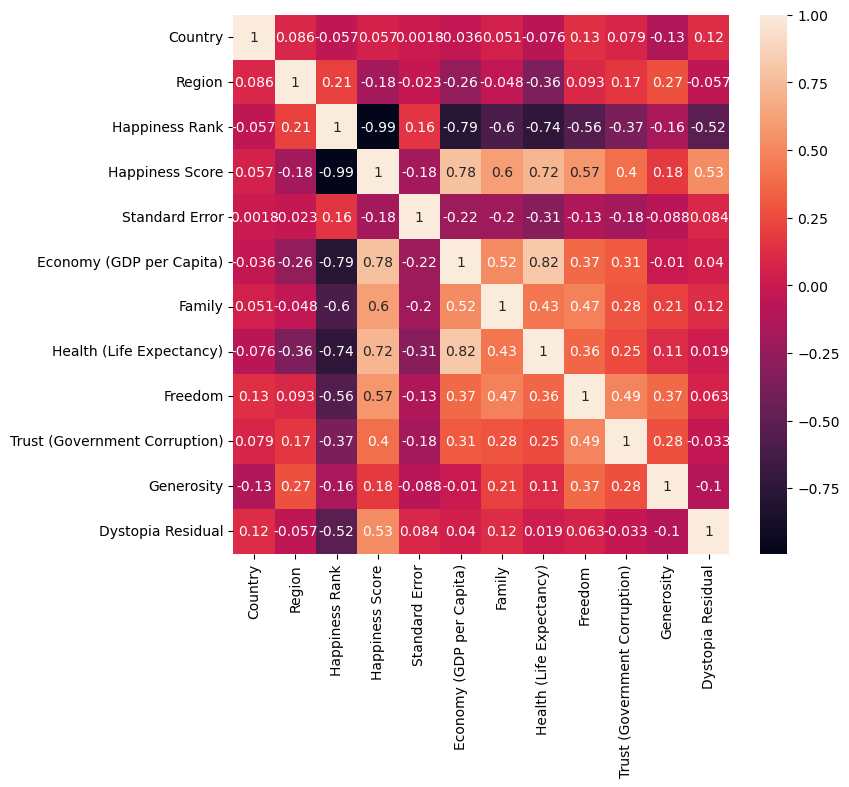

In [58]:
corr_hmap=hdf.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [59]:
lm=LinearRegression()

In [61]:
lm.fit(train_x,train_y)

LinearRegression()

In [62]:
lm.predict(test_x)

array([[4.68043013],
       [7.57362174],
       [4.53246444],
       [4.13288004],
       [5.63171159],
       [7.55842282],
       [4.23741493],
       [4.55720343],
       [5.11558288],
       [6.46722586],
       [4.37077663],
       [4.06923914],
       [7.28683054],
       [4.77102453],
       [5.52579019],
       [4.64501267],
       [5.35161973],
       [3.94487256],
       [3.83776984],
       [5.94346031],
       [3.7003793 ],
       [6.4057184 ],
       [4.18147031],
       [4.39644908],
       [5.92164109],
       [5.14115718],
       [4.33412083],
       [5.75699184],
       [3.80051263],
       [7.42073796],
       [6.27321166],
       [6.56354979],
       [6.30105187],
       [5.05889561],
       [4.82579551],
       [4.24053872],
       [5.10363268],
       [6.73290268],
       [5.31481812],
       [7.2727856 ],
       [6.71093216],
       [5.20503251],
       [6.52403677],
       [6.3980447 ],
       [5.79600031],
       [5.79815296],
       [7.53753564],
       [4.846

In [63]:
lm.coef_

array([[1.05111184, 1.29742468, 0.00198454, 0.95950955, 1.30910447,
        0.81447299, 1.00360512, 1.0473688 ]])

In [64]:
lm.intercept_

array([0.36929615])

In [65]:
hdf.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [66]:
lm.score(train_x,train_y)

0.9788333488714807

In [67]:
pred=lm.predict(test_x)
print("Predicted result score:",pred)
print("actual score",test_y)

Predicted result score: [[4.68043013]
 [7.57362174]
 [4.53246444]
 [4.13288004]
 [5.63171159]
 [7.55842282]
 [4.23741493]
 [4.55720343]
 [5.11558288]
 [6.46722586]
 [4.37077663]
 [4.06923914]
 [7.28683054]
 [4.77102453]
 [5.52579019]
 [4.64501267]
 [5.35161973]
 [3.94487256]
 [3.83776984]
 [5.94346031]
 [3.7003793 ]
 [6.4057184 ]
 [4.18147031]
 [4.39644908]
 [5.92164109]
 [5.14115718]
 [4.33412083]
 [5.75699184]
 [3.80051263]
 [7.42073796]
 [6.27321166]
 [6.56354979]
 [6.30105187]
 [5.05889561]
 [4.82579551]
 [4.24053872]
 [5.10363268]
 [6.73290268]
 [5.31481812]
 [7.2727856 ]
 [6.71093216]
 [5.20503251]
 [6.52403677]
 [6.3980447 ]
 [5.79600031]
 [5.79815296]
 [7.53753564]
 [4.84633583]]
actual score      Happiness Score
99             4.874
0              7.587
147            3.678
133            4.218
80             5.194
3              7.522
135            4.077
115            4.571
87             5.102
34             6.411
117            4.550
144            3.819
10             7.

In [68]:
print('error:')
print('Mean absolute error:',mean_absolute_error(test_y,pred))
print('Mean squared error:',mean_squared_error(test_y,pred))

print('Root Mean Squared Error:',np.sqrt(mean_squared_error(test_y,pred)))

error:
Mean absolute error: 0.12987002363108965
Mean squared error: 0.04133992807532192
Root Mean Squared Error: 0.20332222720431212


In [70]:
print(r2_score(test_y,pred))

0.9696858916226119
